# COGS 108 - Influencing Factors of Average Class GPA

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Video

[Video Link](https://youtu.be/u8TFgo6A91Q)


# Overview

This project investigated various factors influencing the average GPA of classes at UCSD. Using the CAPE dataset, we discovered a strong positive correlation between expected and actual GPA, validating our hypothesis. Study time commitment has a weak negative correlation with GPA, while class and professor recommendations revealed a weak positive correlation with the final GPA. Arts-related classes tend to have higher GPAs than engineering classes. Regular term and summer sessions yielded comparable GPAs. Contrary to our initial assumption, we found that many departments reported higher or no significantly different average GPAs for upper division classes than their lower division counterparts.


# Names

- Haonan He
- Xuechen kan
- Yiqing Bo
- Fanglei Gao
- Keyi Chen

<a id='research_question'></a>
# Research Question

What factors are critical in predicting the average GPA that students of a class will receive at UCSD? Specifically, the following factors are considered:

- Whether the class is a lower or upper division (upper division if course codes number >= 100)
- The department offering the class
- Whether the class is taken during a regular term (FA,WI,SP) or a summer session (SU,S1,S2,S3)
- The proportion of students recommending the class or the instructor
- The average time commitment per week for the course
- The expected GPA

<a id='background'></a>

## Background & Prior Work


Among picking the topics of interest for our group, we all agreed on researching about class grades from CAPES that UCSD students concerned greatly. CAPES is one of the most authoritative and useful source for finding the gradings and other data for a course in UCSD, therefore after scraping the newest CAPES data, we are able to proceed with analyzing. 
With great disparity in the actual grade received from different classes in the CAPES data, there are many factors that could affect the grade students received in specific classes. Therefore our group researched on what and how those other factors affect the average grade students received in each class.

In this past project shown in source1: This group of UCSD students also did research on past CAPES data and analyzed the data. The difference is that their focus was on helping students to decide which class to pick, and the research hypothesis focused on three major factors: Class size, hours spent on each class, and the professor rating of the class. Using methods such as plotting histograms, they were able to reach the following conclusions:
1. Courses with higher professors’ and courses’ recommendation turned out to be a better choice for students.
2. Study hours/week is a good indicator of the difficulty of courses.
3. Summer session is a better choice for students who wish to achieve a higher GPA.
4. Courses with larger class size have an overall lower GPA compared to those with smaller sizes.
5. The course with larger size has a higher CAPEs completion rate which indicates that the CAPEs data for large-sized classes is more accurate and convincing.”
Note that there are some differences in research methods and objectives, since we mainly focus on the average GPA received by students, while their group focused on more aspects of whether students should pick a specific class. 

In the second project researched (source 2): it used data from UCL research on Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, (source 3). It researched on the different aspects of how a student's grade received is affected by several other factors and predicted students grade based on these factors. Different from our project, which mainly focuses on the average grade for each class, their research was more concerned on what affects a specific students grade. Although the objective of research is different, their research use similar methodes as ours, such as linear regression and graphing out the data. The conclusion they reached is that through linear regression on all the variables of each student, a minimum squared margin of error is accomplished base on variables including age, gender, urban or rural. 

References (include links):
- 1) https://github.com/neal3560/UCSD-CAPEs-Data-Mining/blob/master/FinalProject.ipynb
- 2) https://www.kaggle.com/code/dipam7/introduction-to-eda-and-machine-learning
- 3) https://www.kaggle.com/datasets/dipam7/student-grade-prediction

# Hypothesis


It is expected that the class's average actual GPA will have a strong and positive correlation with the average expected GPA. Additionally, the average time commitment is presumed to have a medium strength and negative correlation with the class's average actual GPA. We expect the average GPA for subjects under the art department (VIS, MUS, ICAM, etc) to be higher than that of the engineering department (CSE, ENG, ME, ECE, etc). Lower division classes of the same department are expected to have a higher average GPA than higher division classes. Furthermore, the percentage of students recommending the class or the professor is assumed to show a weak and positive correlation with the average actual GPA. Finally, there are no significant expectations that the average GPA received during summer sessions will vary compared to that of the regular terms.

# Dataset(s)

Dataset Name: cape_data

Link to the dataset: https://cape.ucsd.edu/, scraped data in "cape_data.csv"

Number of observations: 62130 (before cleaning)

This is the cape evaluation data of UCSD from the term Summer, 2007 to Winter, 2023.

The dataset contains 62130 rows of observations, where each row represents the evaluation data of a class, specified by its course code, time, section, and teaching instructor.

 Each observation is described by 14 variables, including:
- Instructor: The name of the instructor for the course. (String)
- Course: The course code.  (String)
- Term: The term during which the course was offered.  (String)
- Enroll: The number of students enrolled in the class. (integer)
- Evals The number of evaluations received from students. (integer)
- Rcmnd_Class: The proportion of responded students who recommend the class.  (float ranging from 0.0 to 1.0)
- Rcmnd_Instr: The proportion of  responded students who recommend the instructor. (float ranging from 0.0 to 1.0)
- study_time: The average amount of time responded students spent on the course per week. (float)
- gpa_expected: Expected average gpa among students in this class who responded this question in Cape. (float ranging from 0.0 to 4.0)
- letter_expected: Average expected letter grade over students who responded this question in Cape (String) 
- gpa_received: Average actual average gpa over all students enrolled in the class (float ranging from 0.0 to 4.0)
- letter_received: Average actual average letter gpa over all students enrolled in the class (String) 
- Section: The section of the course (String) 
- Course Name: THe full course name (String)

Limitations: In our cape dataset, variables such as percent of class/professor recommendations and expected average gpa are only sampled over students who has responded the corresponding cape question, whereas the average gpa and letter grades are averaged over all enrolled students of the class. Thus, dataset with relatively small response size compared to the actual class size should be used carefully. (we would like to set a threshold that filters off classes with response rate < 0.4 in a later stage when using relevant variables, calculated by Evals Made/ Enroll)

# Setup

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
# Read the CSV file
df = pd.read_csv('cape_data.csv')
df.shape

(62130, 10)

# Data Cleaning

Since we are interested in Avg Grade Received, we remove rows that have `NaN` values for this column.

In [3]:
df = df.dropna(subset=['Avg Grade Received'])

Since Rcmnd Class, Rcmnd Instr, Avg Grade Expected, Avg Grade Received are all in string formats, we change them into floats.

In [4]:
df['Letter Grade Expected'] = df['Avg Grade Expected'].str.extract('(\w+\+?\-?) ')
df['Letter Grade Received'] = df['Avg Grade Received'].str.extract('(\w+\+?\-?) ')

df['Avg Grade Expected'] = df['Avg Grade Expected'].str.extract('\((.*)\)').astype(float)
df['Avg Grade Received'] = df['Avg Grade Received'].str.extract('\((.*)\)').astype(float)

df['Rcmnd Class'] = df['Rcmnd Class'].str[:-1].astype(float) / 100
df['Rcmnd Instr'] = df['Rcmnd Instr'].str[:-1].astype(float) / 100

Currently the `Course` column contains three pieces of information: the code, name, and specific section of the course. To make our dataset 1NF, we use three columns to store these three variables.

In [5]:
df[['Course', 'Course Name', 'Section']] = df['Course'].str.extract(r'([A-z]+ \d+[A-z]*) - (.*) \((.*)\)')

We also found that in some entries, the number of evaluations is larger than the number of students enrolled. We simply drop them:

In [6]:
df = df[df['Evals Made'] <= df['Enroll']]

Rename columns names for clarity.

In [7]:
df = df.rename(columns={
    'Evals Made': 'Evals',
    'Rcmnd Class': 'Rcmnd_Class',
    'Rcmnd Instr': 'Rcmnd_Instr',
    'Study Hrs/wk': 'study_time',
    'Avg Grade Expected': 'gpa_expected',
    'Letter Grade Expected': 'letter_expected',
    'Avg Grade Received': 'gpa_received',
    'Letter Grade Received': 'letter_received'
})

Now, take a look at the cleaned dataset:

In [8]:
df.head()

,Instructor,Course,Term,Enroll,Evals,Rcmnd_Class,Rcmnd_Instr,study_time,gpa_expected,gpa_received,letter_expected,letter_received,Course Name,Section
1,"Butler, Elizabeth Annette",AAS 11,WI23,65,46,0.935,0.933,4.15,3.84,3.71,A-,A-,Intro Black Diasporic Studies,A
2,"Shtienberg, Gilad",ANAR 116,WI23,27,9,1.000,1.000,3.61,4.00,3.62,A,B+,Sea Level Change - Israel,A
4,"Braswell, Geoffrey E.",ANAR 135,WI23,24,15,1.000,0.929,3.42,4.00,3.99,A,A-,Ancient Mediterranean Civ,A
5,"Rodriguez, Eric Andrew",ANAR 164,WI23,41,23,1.000,1.000,4.07,3.80,3.63,A-,B+,Underwater Archaeology,A
7,"Non, Amy L",ANBI 130,WI23,71,45,0.844,0.818,4.28,3.42,3.41,B+,B+,Biology of Inequality,A


In [9]:
df.shape

(44633, 14)

# Data Analysis & Results

## Upper division vs. Lower division GPA Received

First, we want to pre-process the data such that we split observations into upper division classes and lower division classes. This can be done by checking the class number. (>= 100 is upper class)

In [10]:
# Extract and convert the numeric part of the course field
df['Course_num'] = df['Course'].apply(lambda x: int(re.findall('\d+', x.split(' ')[1])[0]))

#Extract subject name 
df['Subject'] = df['Course'].apply(lambda x: x if ' ' not in x else x.split(' ')[0])


# Create the new dataframes
upper = df[df['Course_num'] >= 100].copy()
lower = df[df['Course_num'] < 100].copy()

# Remove the Course_num field from the new dataframes
upper.drop(columns=['Course_num'], inplace=True)
lower.drop(columns=['Course_num'], inplace=True)


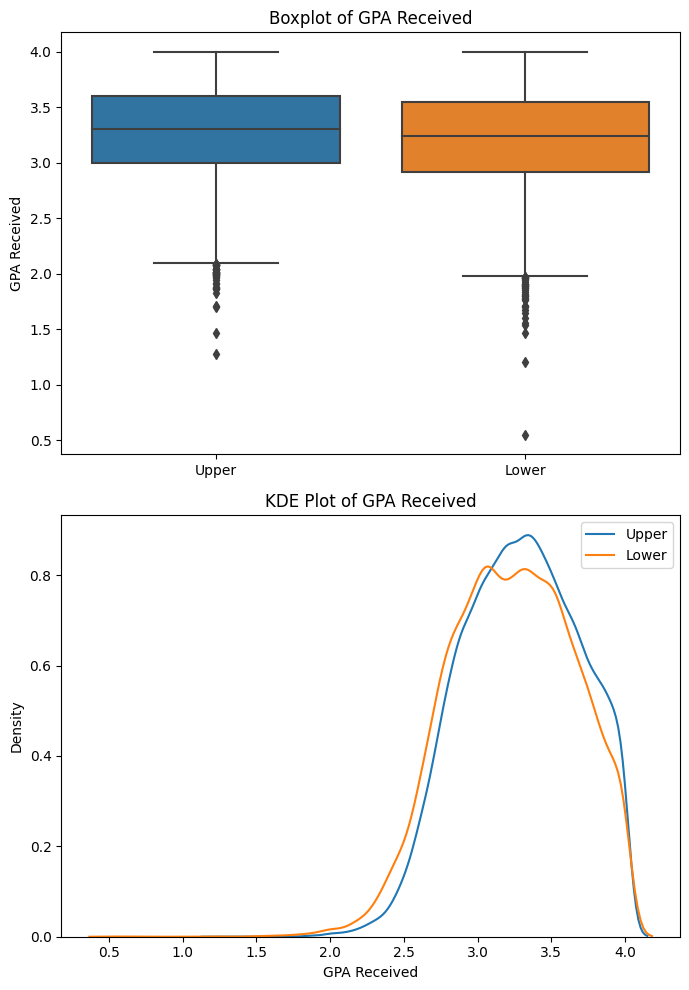

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(7, 10))

# Plot a boxplot
sns.boxplot(data=[upper['gpa_received'], lower['gpa_received']], ax=axes[0])
axes[0].set_xticklabels(['Upper', 'Lower'])
axes[0].set_ylabel('GPA Received')
axes[0].set_title('Boxplot of GPA Received')

# Plot a KDE plot
sns.kdeplot(upper['gpa_received'], label='Upper', ax=axes[1])
sns.kdeplot(lower['gpa_received'], label='Lower', ax=axes[1])
axes[1].set_xlabel('GPA Received')
axes[1].set_title('KDE Plot of GPA Received')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

The box plot and KDE plot suggest that upper-division classes have a slightly higher median GPA and more instances of elevated GPAs than lower-division classes. This contradicts our initial hypothesis that lower-division classes have a higher GPA. However, we must consider other influencing factors like department. Stratified analysis by department will help validate these findings.


In [12]:
# Define a function to map subjects to departments
def map_to_department(subject):
    if subject in ['BENG', 'BGGN', 'BGJC', 'BGRD', 'BGSE', 'BIBC', 'BICD', 'BIEB', 'BILD', 'BIMM', 'BIOM', 'BIPN', 'BISP', 'BNFO', 'CENG', 'CHEM', 'MATH', 'PHYS']:
        return 'Physical Science'
    elif subject in [ 'CLRE', 'FMPH', 'GLBH', 'MED', 'NEU', 'NEUG', 'OBG', 'OPTH', 'ORTH', 'PATH', 'PEDS', 'PH', 'PHAR', 'PHB', 'PHLH', 'PHYS', 'PSY', 'PSYC', 'RAD', 'RMAS', 'RMED', 'SPPH', 'SPPS', 'SURG', 'UROL']:
        return 'Health and Medicine'
    elif subject in ['ANAR', 'ANBI', 'ANSC', 'ANTH']:
        return 'Anthropology and Archaeology'
    elif subject in ['AESE', 'CSE', 'DSC', 'DSE', 'ECE', 'ENG', 'ICAM', 'MAE', 'MATS', 'NANO', 'SE', 'WES']:
        return 'Engineering'
    elif subject in ['ESYS', 'SIO', 'SIOC', 'SIOG', 'SIOB']:
        return 'Environmental and Earth Sciences'
    elif subject in ['AAS', 'AUD', 'CCS', 'CGS', 'CLSS', 'COGR', 'COGS', 'COMM', 'CONT', 'DOC', 'ECON', 'EDS', 'EDU', 'ETHN', 'GMST', 'GSS', 'HILA', 'HILD', 'HINE', 'HISC', 'HITO', 'HIUS', 'HMNR', 'HDP', 'HDS', 'HIEA', 'HIEU', 'HLAW', 'HUM', 'INTL', 'IRLA', 'JWSP', 'LATI', 'LAWS', 'LHCO', 'LIDS', 'LISL', 'LISP', 'LT', 'MMW', 'MSP', 'PHIL', 'POLI', 'RELI', 'SOCE', 'SOCG', 'SOCI', 'SOCL', 'TMC', 'TKS', 'TWS', 'USP']:
        return 'Humanities and Social Sciences'
    elif subject in ['MGT', 'MGTA', 'MGTF', 'MGTP', 'GPS']:
        return 'Business and Management'
    elif subject in ['CHIN', 'CLIN', 'ICEP', 'JAPN', 'LIAB', 'LIDS', 'LIEO', 'LIFR', 'LIGM', 'LIGN', 'LIHI', 'LIHL', 'LIIT', 'LIPO', 'LISL', 'LISP', 'LTAF', 'LTAM', 'LTCH', 'LTCO', 'LTCS', 'LTEA', 'LTEN', 'LTEU', 'LTFR', 'LTGK', 'LTGM', 'LTIT', 'LTKO', 'LTLA', 'LTRU', 'LTSP', 'LTTH', 'LTWL', 'LTWR']:
        return 'Languages and Linguistics'
    elif subject in ['DSGN', 'TDAC', 'TDDE', 'TDDM', 'TDDR', 'TDGE', 'TDGR', 'TDHD', 'TDHT', 'TDMV', 'TDPF', 'TDPR', 'TDPW', 'TDTR', 'VIS', 'MUS', 'FILM']:
        return 'Arts'
    elif subject in ['AIP', 'EAP', 'SYN']:
        return 'Work-study'
    elif subject in ['AWP', 'CAT', 'WCWP', 'ERC', 'MUIR', 'REV', 'SEV', 'SXTH', 'WARR']:
        return 'Required Writing/college'
    else:
        return 'Others'

df['Department'] = df['Subject'].apply(map_to_department)
df['Department'].value_counts()

Humanities and Social Sciences      12852
Physical Science                    10762
Engineering                          6211
Arts                                 4045
Languages and Linguistics            3471
Health and Medicine                  2084
Business and Management              1885
Environmental and Earth Sciences      954
Others                                813
Anthropology and Archaeology          771
Required Writing/college              739
Work-study                             46
Name: Department, dtype: int64

Now we continue comparing lower vs. upper division GPA received, stratified by department of courses they belong to.

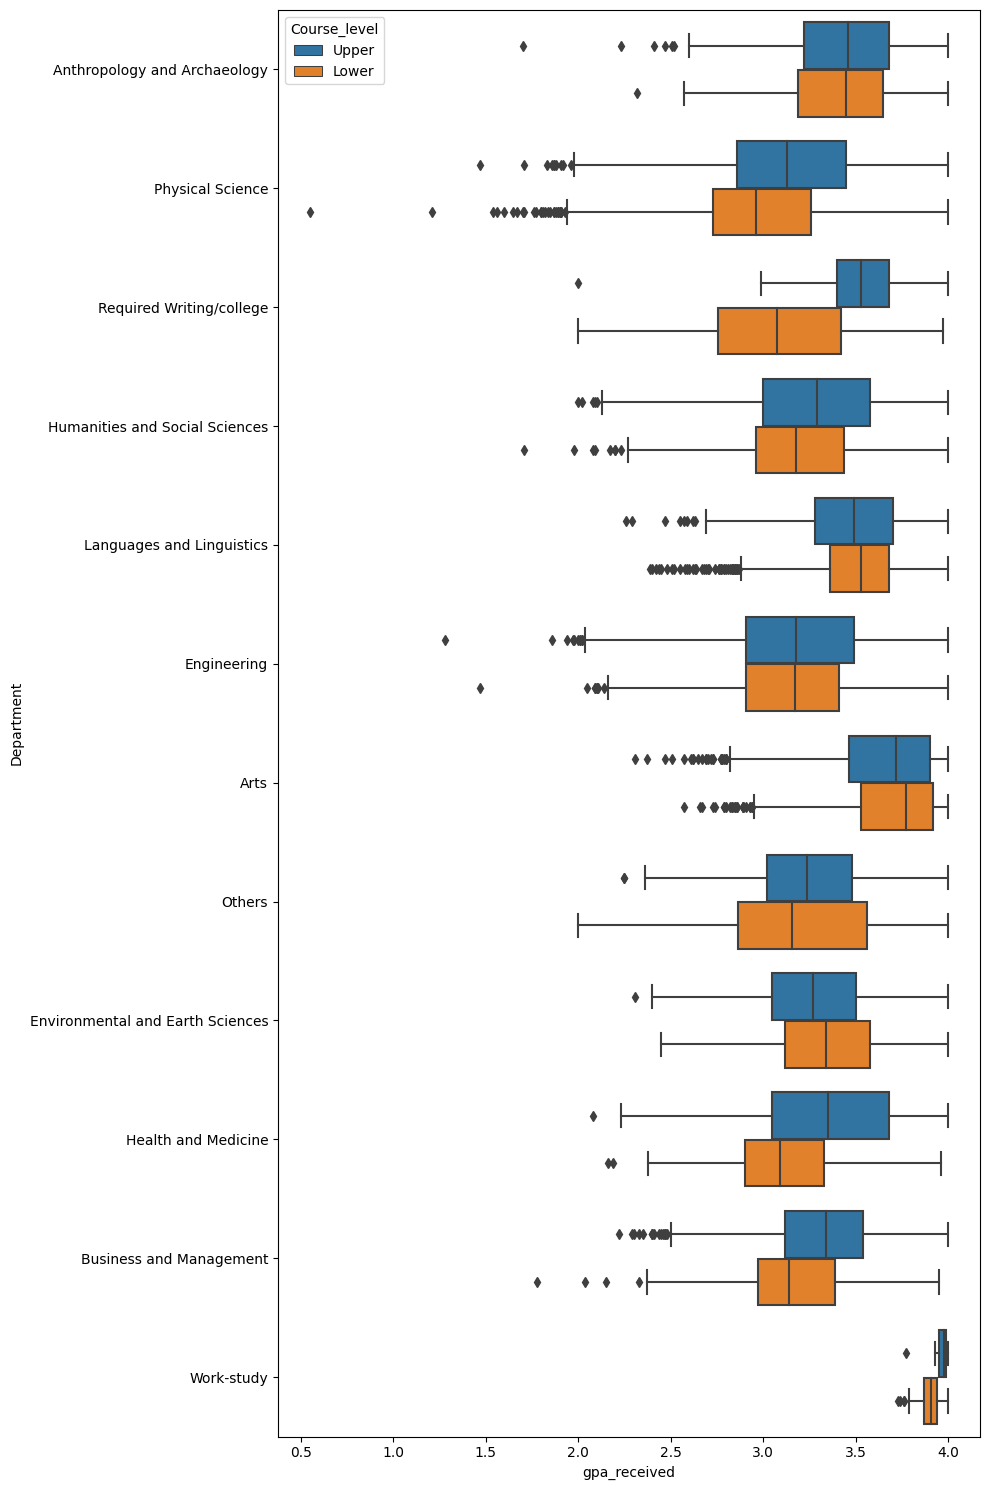

In [13]:
# Update lower and upper
upper = df[df['Course_num'] >= 100].copy()
lower = df[df['Course_num'] < 100].copy()

# Add 'Course_level' column
upper['Course_level'] = 'Upper'
lower['Course_level'] = 'Lower'

# Concatenate DataFrames
df_concat = pd.concat([upper, lower])

# Set up the matplotlib figure
plt.figure(figsize=(10, 15))

# Create boxplot
sns.boxplot(y='Department', x='gpa_received', hue='Course_level', data=df_concat, orient='h')

plt.tight_layout()
plt.show()

When examining the breakdown by department, we observe that the phenomenon of higher GPA in upper division classes persists. A glance suggests a greater number of departments exhibit higher GPAs for upper division classes compared to lower division classes. We will further validate our finding using Inferential analysis.

To conduct a T-test, we need to check the normality assumption. This can be done using Shapiro-Wilk test.

In [14]:
# List of unique departments
departments = df['Department'].unique()

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', 'p-value may not be accurate for N > 5000')
    for dept in departments:
        upper_gpa = upper[upper['Department'] == dept]['gpa_received']
        lower_gpa = lower[lower['Department'] == dept]['gpa_received']

        # Perform the Shapiro-Wilk test
        upper_stat, upper_p = stats.shapiro(upper_gpa)
        lower_stat, lower_p = stats.shapiro(lower_gpa)

        print(f"Department: {dept}")
        print(f"Upper division: W-statistic: {upper_stat}, p-value: {upper_p}")
        print(f"Lower division: W-statistic: {lower_stat}, p-value: {lower_p}\n")


Department: Humanities and Social Sciences
Upper division: W-statistic: 0.9845085144042969, p-value: 4.486127958416018e-31
Lower division: W-statistic: 0.993523895740509, p-value: 8.043040539140733e-11

Department: Anthropology and Archaeology
Upper division: W-statistic: 0.9672088623046875, p-value: 4.540444409339983e-10
Lower division: W-statistic: 0.9722952246665955, p-value: 0.0007164368289522827

Department: Required Writing/college
Upper division: W-statistic: 0.9261147379875183, p-value: 3.0278989981979976e-08
Lower division: W-statistic: 0.9862067699432373, p-value: 4.733059540740214e-05

Department: Physical Science
Upper division: W-statistic: 0.989533543586731, p-value: 6.07539643385442e-21
Lower division: W-statistic: 0.9923014044761658, p-value: 4.102140329487582e-15

Department: Languages and Linguistics
Upper division: W-statistic: 0.9844896793365479, p-value: 2.3282092399823373e-12
Lower division: W-statistic: 0.9561535716056824, p-value: 5.787693863497622e-23

Departme

Given the p-values from the Shapiro-Wilk normality tests for each department's lower and upper division courses, we find that most of these p-values are smaller than our chosen significance level (alpha) of 0.05. Therefore we reject the corresponding null hypothesis, which states that the GPA data are normally distributed. 

Given the violation of normality assumptions, we cannot use independent Samples t-test. Instead, we can use Kruskal-Wallis H test to compare the distributions of upper vs. lower division pairs for each department. 

In [15]:
for dept in departments:
    upper_gpa = upper[upper['Department'] == dept]['gpa_received']
    lower_gpa = lower[lower['Department'] == dept]['gpa_received']

    # Perform the Kruskal-Wallis test
    stat, p = stats.kruskal(upper_gpa, lower_gpa)

    print(f"Department: {dept}")
    print(f"Kruskal-Wallis H-test statistic: {stat}, p-value: {p}. ")

      # Decision making
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis.")
        if upper_gpa.median() > lower_gpa.median():
            print("GPA for upper div > lower div\n")
        else:
            print("GPA for upper div < lower div\n")
    else:
        print("Fail to reject the null hypothesis.\n")

Department: Humanities and Social Sciences
Kruskal-Wallis H-test statistic: 143.3922474393693, p-value: 4.824681813212226e-33. 
Reject the null hypothesis.
GPA for upper div > lower div

Department: Anthropology and Archaeology
Kruskal-Wallis H-test statistic: 0.5060067566808943, p-value: 0.4768726289501255. 
Fail to reject the null hypothesis.

Department: Required Writing/college
Kruskal-Wallis H-test statistic: 159.25499202685504, p-value: 1.6459851353876173e-36. 
Reject the null hypothesis.
GPA for upper div > lower div

Department: Physical Science
Kruskal-Wallis H-test statistic: 423.997928878235, p-value: 3.290481509504227e-94. 
Reject the null hypothesis.
GPA for upper div > lower div

Department: Languages and Linguistics
Kruskal-Wallis H-test statistic: 5.993841574368811, p-value: 0.014355905042725674. 
Reject the null hypothesis.
GPA for upper div < lower div

Department: Engineering
Kruskal-Wallis H-test statistic: 5.690703108768323, p-value: 0.017055019892381253. 
Reject t

Based on the conducted Kruskal-Wallis H tests, we found statistically significant differences in GPA distributions between upper and lower division courses within some departments. In particular, when manually comparing their median GPAs, we observed that upper division courses had higher GPAs in Humanities and Social Sciences, Required Writing/college, Physical Science, Engineering, Health and Medicine, Business and Management, and Work-study departments/fields. In contrast, lower division courses had higher GPAs in the Languages and Linguistics, Arts, and Environmental and Earth Sciences departments.

There were no statistically significant differences in the GPA distributions of upper and lower division courses within the Anthropology and Archaeology and "Others" departments.

Our findings reveal that the pattern of upper division classes having higher GPAs is very common across departments, but not necessarily universal across all departments. Some departments show the opposite trend, or no significant difference in GPA distributions between upper and lower division classes. This suggests the relationship between class level and GPA can be dependent on the specific department.

## Course Department and GPA received

In our previous categorization, we grouped classes based on the departments/disciplines they belong to. Now, we will create boxplots to visualize the distribution of GPA received for courses within each department.

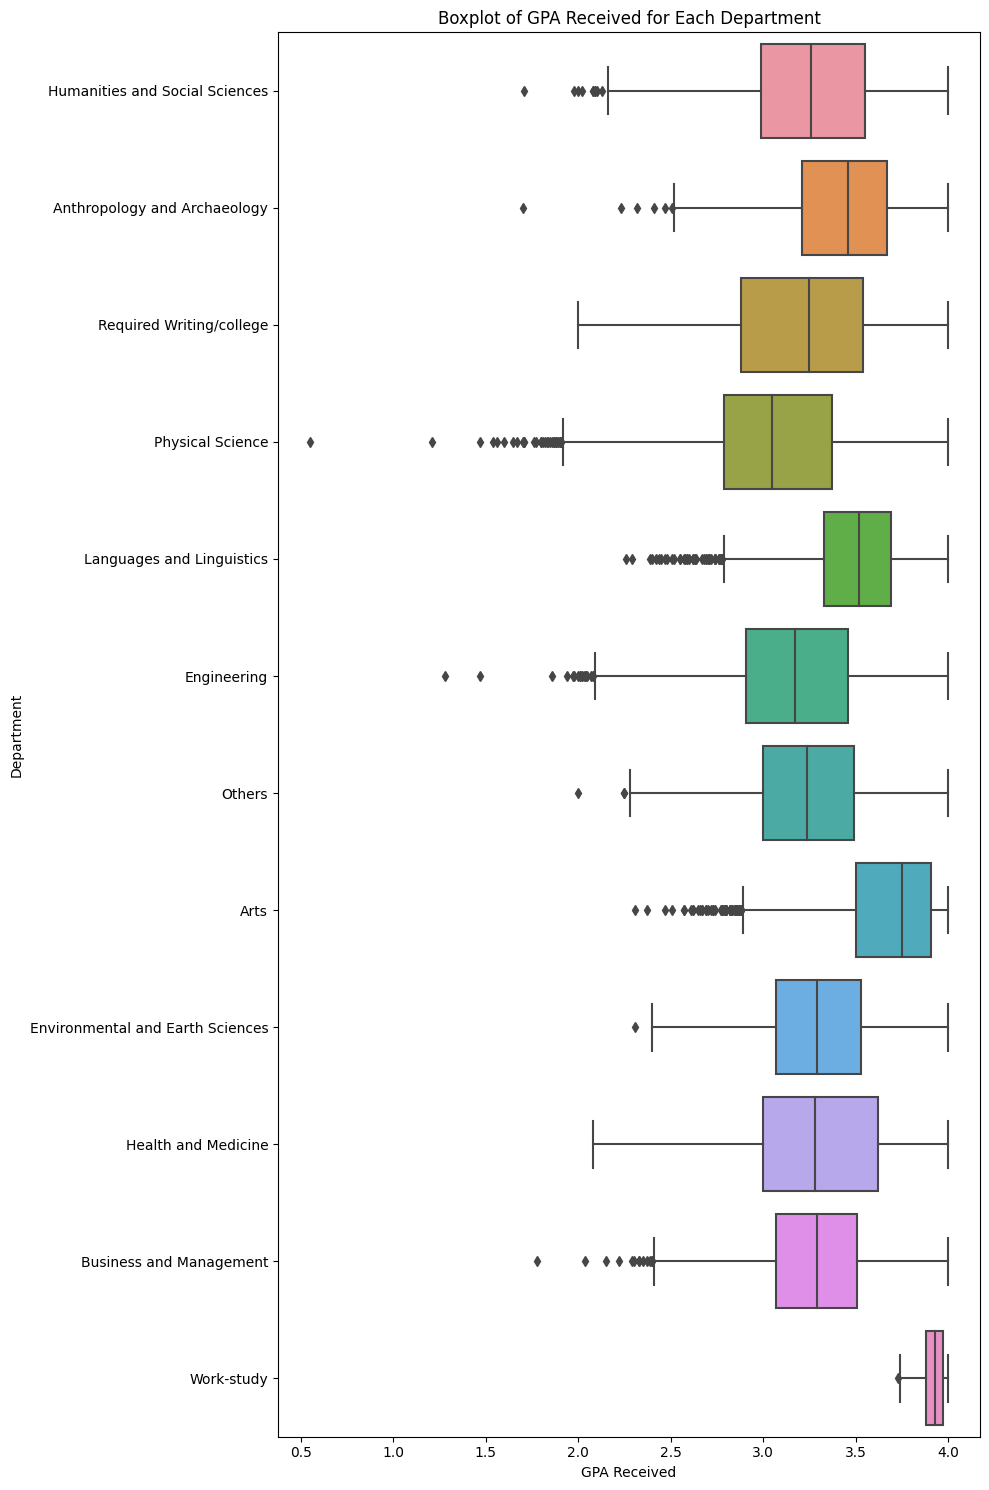

In [16]:
plt.figure(figsize=(10, 15))
sns.boxplot(y='Department', x='gpa_received', data=df, orient='h')
plt.title('Boxplot of GPA Received for Each Department')
plt.xlabel('GPA Received')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

From the GPA distribution above, it appears that Arts-related classes receive higher GPAs than Engineering classes, which aligns with the hypothesis. We can testify this again using Kruskal-Wallis H test.

In [17]:
results = []

# Apply the Kruskal-Wallis test to each department
for dept in departments:
    gpa = df[df['Department'] == dept]['gpa_received']
    # Store the department, median GPA, and number of observations
    results.append((dept, gpa.median(), len(gpa)))

# Sort the results by median GPA
results.sort(key=lambda x: x[1], reverse=True)
# Print dept in order of median GPA
for dept, median_gpa, num_obs in results:
    print(f"Department: {dept}, Median GPA: {median_gpa}, Number of observations: {num_obs}")

# Perform the Kruskal-Wallis test on Art department vs. Engineering department
arts_gpa = df[df['Department'] == 'Arts']['gpa_received']
engineering_gpa = df[df['Department'] == 'Engineering']['gpa_received']
stat, p = stats.kruskal(arts_gpa, engineering_gpa)

print(f"\nKruskal-Wallis H-test statistic: {stat}, p-value: {p}")

# Decision making
alpha = 0.05
if p < alpha:
    print("The diff in GPA distribution between Arts and Engineering classes is statistically significant. Reject the null hypothesis.")
else:
    print("The diff in GPA distribution between Arts and Engineering classes is not statistically significant. Fail to reject the null hypothesis.")

Department: Work-study, Median GPA: 3.93, Number of observations: 46
Department: Arts, Median GPA: 3.75, Number of observations: 4045
Department: Languages and Linguistics, Median GPA: 3.52, Number of observations: 3471
Department: Anthropology and Archaeology, Median GPA: 3.46, Number of observations: 771
Department: Environmental and Earth Sciences, Median GPA: 3.29, Number of observations: 954
Department: Business and Management, Median GPA: 3.29, Number of observations: 1885
Department: Health and Medicine, Median GPA: 3.28, Number of observations: 2084
Department: Humanities and Social Sciences, Median GPA: 3.26, Number of observations: 12852
Department: Required Writing/college, Median GPA: 3.25, Number of observations: 739
Department: Others, Median GPA: 3.24, Number of observations: 813
Department: Engineering, Median GPA: 3.17, Number of observations: 6211
Department: Physical Science, Median GPA: 3.05, Number of observations: 10762

Kruskal-Wallis H-test statistic: 3549.57870

This demonstrates a statistically significant difference in GPA distribution between Arts and Engineering classes, specifically, the median GPA of Arts classes (3.75) is found to be higher than that of Engineering classes (3.17), which aligns with our hypothesis and insights from the EDA.

## Course Terms and GPA Received

Then, let's examine whether the GPA received is related to the different terms in which the classes are taken. But first, let's check how many courses are offered each quarter.

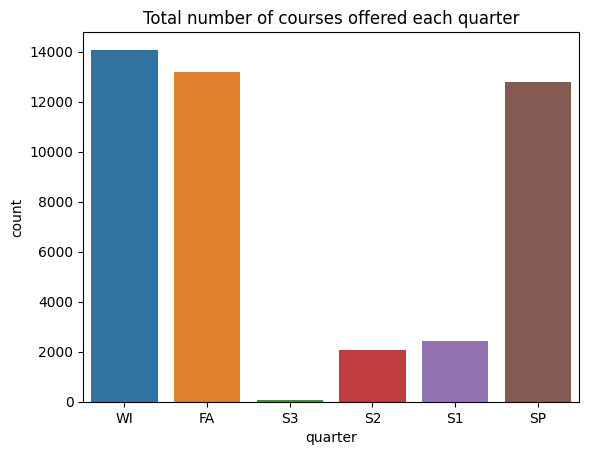

In [18]:
df['quarter'] = df['Term'].str[:2]
sns.countplot(x='quarter', data=df)
plt.title('Total number of courses offered each quarter')
plt.show()

It seems like summer sessions have a lot less courses offered, which shouldn't be surprising: summer sessions only offer some courses that are difficult to enroll in during regular quarters.

Next, we find out whether GPA received differs by quarter:

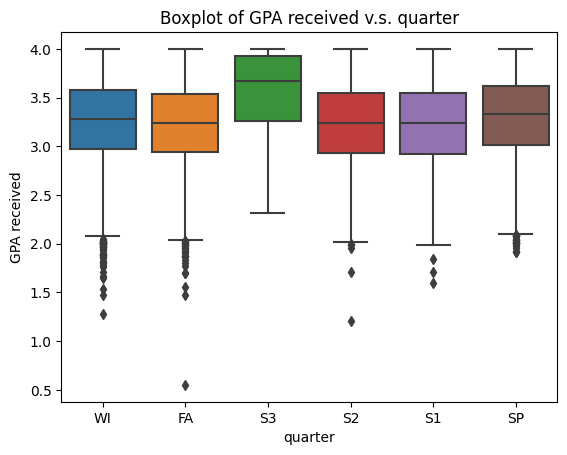

In [19]:
sns.boxplot(x='quarter', y='gpa_received', data=df)
plt.title('Boxplot of GPA received v.s. quarter')
plt.ylabel('GPA received')
plt.show()

It seems like S3 has a higher median GPA than other quarters. But will summer sessions in general have a higher GPA than regular terms?

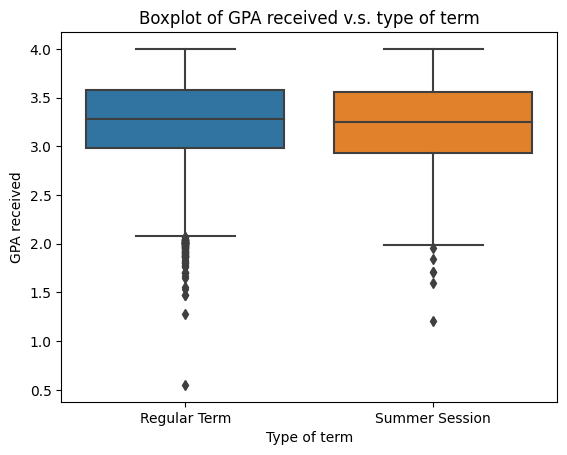

In [20]:
df['is_summer'] = df['quarter'].apply(lambda x: x in ['SU', 'S1', 'S2', 'S3'])
sns.boxplot(x='is_summer', y='gpa_received', data=df)
plt.title('Boxplot of GPA received v.s. type of term')
plt.ylabel('GPA received')
plt.xlabel('Type of term')
plt.xticks(ticks=[0, 1], labels=['Regular Term', 'Summer Session'])
plt.show()

It seems that whether the term is a summer session or not does not have a significant impact on the average GPA received. Summer sessions only appear to have slightly lower GPAs, and we would need to later check if this difference is significant through statistical inference.

However, even if the median is similar, the distribution under summer quarters and regular quarters might still be different! So let's take a look at the distribution of GPA under each. Note that since there are fewer courses offered in summer, it makes more sense to plot the histogram based on percentages instead of counts.

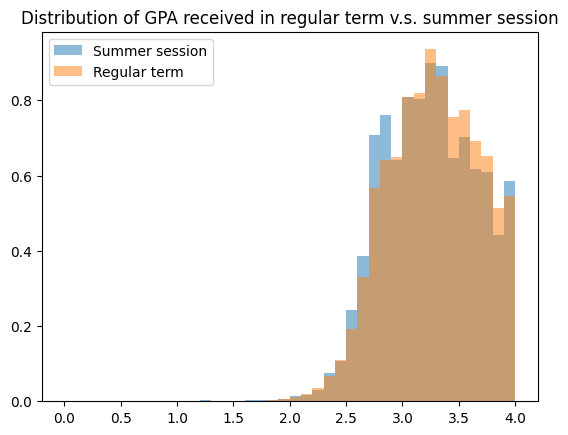

In [21]:
summer_gpa = df[df['is_summer'] == True]['gpa_received']
regular_gpa = df[df['is_summer'] == False]['gpa_received']
bins = np.arange(0, 4.1, 0.1)
plt.hist(summer_gpa, bins=bins, alpha=0.5, label='Summer session', density=True)
plt.hist(regular_gpa, bins=bins, alpha=0.5, label='Regular term', density=True)
plt.legend()
plt.title('Distribution of GPA received in regular term v.s. summer session')
plt.show()

<!-- The distribution of GPA also looks similar! This is in fact what we expected in our hypothesis, and we will continue to verify this through statistical inference.  -->
The distribution of GPA under summer sessions shows more entries in the 2.5-3.0 range, and fewer entries in the 3.5-3.9 range, which explains why summer session classes result in a slightly lower average GPA. And we will later continue to verify this through statistical inference.

Now, we are ready for testing out whether the above observations are statistically significant. We first want to check whether the mean GPA received is different, so we again use the Kruskal-Wallis H test, with a significant level $\alpha=0.05$.

In [22]:
# first, check the means of each 
print(f'Average GPA received in summer sessions: {summer_gpa.mean()}\nAverage GPA received in regular terms: {regular_gpa.mean()}')

Average GPA received in summer sessions: 3.242554872695347
Average GPA received in regular terms: 3.2716445841754624


In [23]:
statistic, p_value = stats.kruskal(summer_gpa, regular_gpa)
print(f'test statistic: {statistic}\np-value: {p_value}')

test statistic: 23.12554774000911
p-value: 1.5176084617583515e-06


Thus, summer sessions have a mean GPA 0.03 lower than regular terms, and the p-value is smaller than our significant level, so the is difference is statistically significant. Summer sessions do have a lower GPA than regular terms, different from our hypothesis.

We then want to check whether the difference between the distribution of average GPA received under regular terms vs. summer sessions is statistically significant. We perform the Kolmogorov-Smirnov test, again with a significant level $\alpha=0.05$.

In [24]:
statistic, p_value = stats.ks_2samp(summer_gpa, regular_gpa)
print(f'KS statistic: {statistic}\np-value: {p_value}')

KS statistic: 0.04031010059805196
p-value: 3.263247474730186e-06


Thus, the p-value is smaller than our significant level, suggesting that the distributions of average GPA received between summer sessions and regular terms are statistically significantly different.

## Class/Instructor Evaluation and GPA Received

In the following cases where we find out the relationship between GPA received and results from student evaluations, we only consider a subset of data: we only consider entries that have $\geq 40\%$ response rate as valid entries, or else the result might not be representative of the whole class.

In [25]:
df_valid = df[df['Evals'] >= 0.4 * df['Enroll']]

Next, we are going to find the proportion of students recommending the class or the instructor vs received average GPA.

Below is the scatter plot of the class recommendation rate and average GPA students received.

<AxesSubplot:xlabel='Rcmnd_Class', ylabel='gpa_received'>

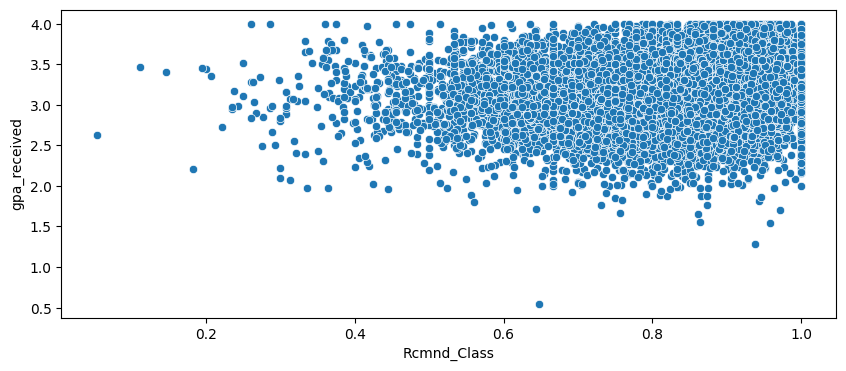

In [26]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Rcmnd_Class', y='gpa_received', data=df_valid)

Here we plot a linear regression line to show the correlation between the two variables.

<Figure size 1000x400 with 0 Axes>

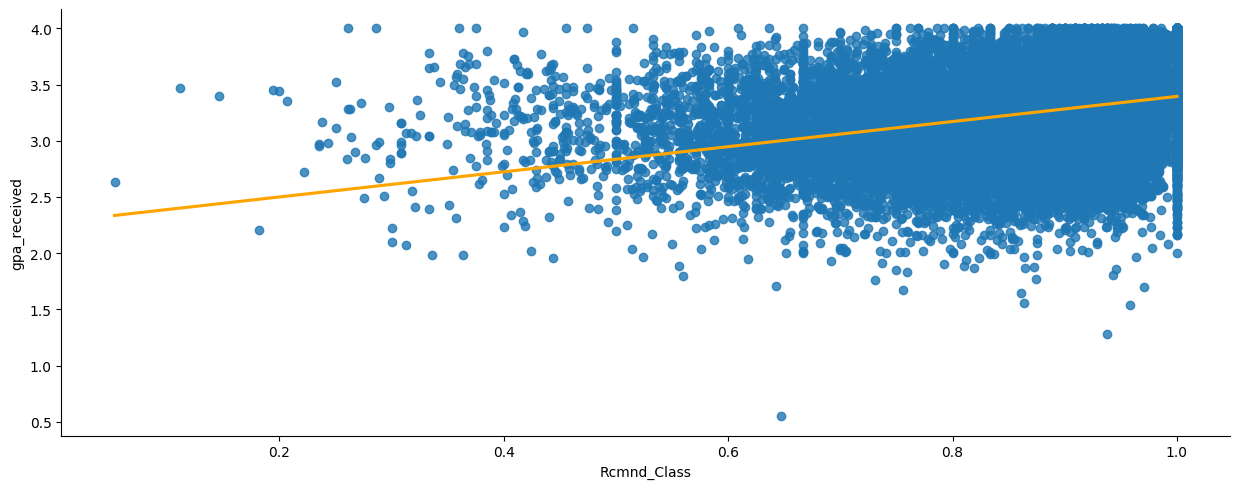

In [27]:
plt.figure(figsize=(10, 4))
sns.lmplot(x="Rcmnd_Class", y="gpa_received", data=df_valid, ci=None, aspect=2.5, line_kws={"color": "orange"})

In [28]:
print('Correlation between the class recommendation rate and average received GPA:', df_valid['Rcmnd_Class'].corr(df_valid['gpa_received']))

Correlation between the class recommendation rate and average received GPA: 0.3253196654426726


From both the plot and pearson correlation ($r$ = 0.3253196654426726) calculated, we can see that there is a weak positive correlation between the class recommendation rate and the average received GPA. 

Here is our OLS Regression Results

In [29]:
x1 = df_valid['Rcmnd_Class']
y = df_valid['gpa_received']
outcome, predictors = patsy.dmatrices('y ~ x1')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3474.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:25:05   Log-Likelihood:                -12939.
No. Observations:               29350   AIC:                         2.588e+04
Df Residuals:                   29348   BIC:                         2.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2767      0.017    134.610      0.0

And this is the scatter plot of the instructor recommendation rate and average GPA students received.

<AxesSubplot:xlabel='Rcmnd_Instr', ylabel='gpa_received'>

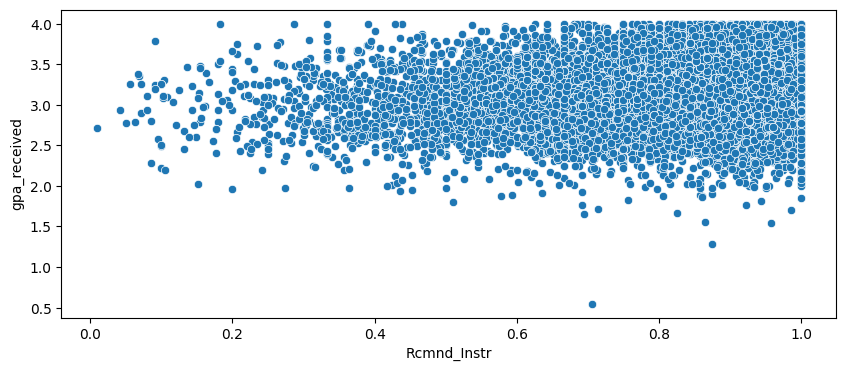

In [30]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Rcmnd_Instr', y='gpa_received', data=df_valid)

Then we also plot a linear regression line to show the correlation between the two variables.

<Figure size 1000x400 with 0 Axes>

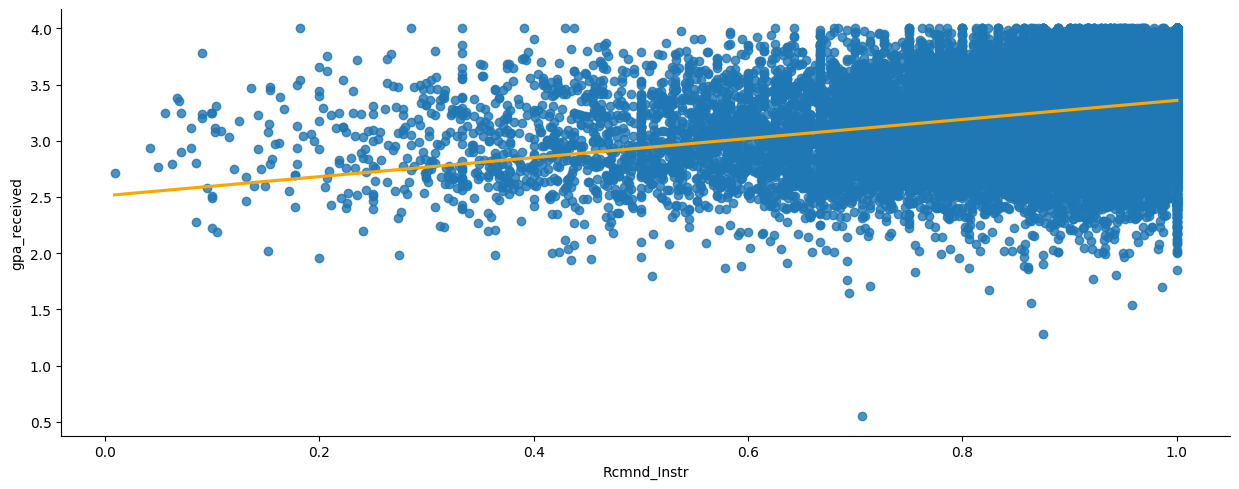

In [31]:
plt.figure(figsize=(10, 4))
sns.lmplot(x="Rcmnd_Instr", y="gpa_received", data=df_valid, ci=None, aspect=2.5, line_kws={"color": "orange"})

In [32]:
print('Correlation between the class recommendation rate and average received GPA:', df_valid['Rcmnd_Instr'].corr(df_valid['gpa_received']))

Correlation between the class recommendation rate and average received GPA: 0.29634512168008087


From both the plot and the pearson correlation ($r$ = 0.29634512168008087) calculated, we can see that there is a weak positive correlation between the instructor recommendation rate and the average received GPA. 

Here is our OLS Regression Results

In [33]:
x2 = df_valid['Rcmnd_Instr']
outcome, predictors = patsy.dmatrices('y ~ x2')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2825.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:25:07   Log-Likelihood:                -13231.
No. Observations:               29350   AIC:                         2.647e+04
Df Residuals:                   29348   BIC:                         2.648e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5115      0.014    175.010      0.0

## Time Commitment and average GPA received
Next, we are interested to see if there is a correlation between study time and average GPA received.
And this is the scatter plot of study time and average GPA students received.

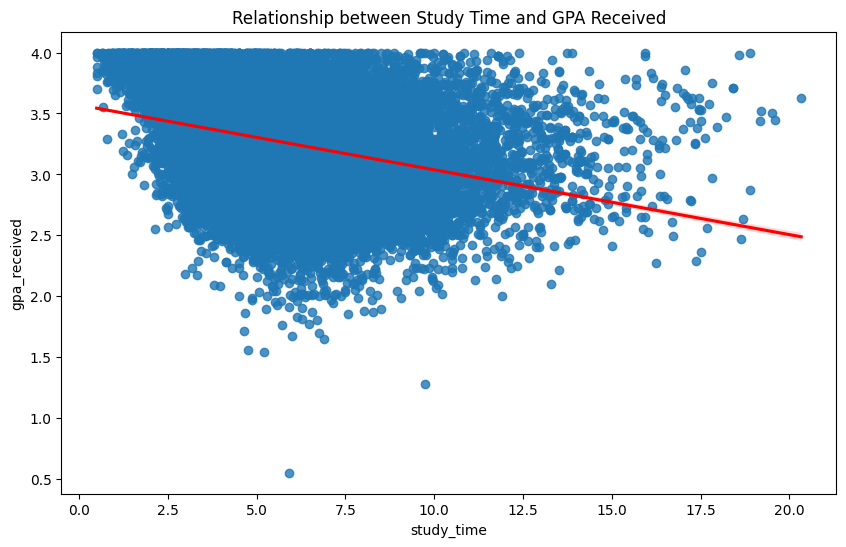

Correlation between Study Time and GPA Received: -0.2998473235271542


In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x='study_time', y='gpa_received', data=df_valid, line_kws={"color": "red"})
plt.title("Relationship between Study Time and GPA Received")
plt.show()
print('Correlation between Study Time and GPA Received:', df_valid['study_time'].corr(df_valid['gpa_received']))

From the plot we can see that there is a weak negative correlation between study time and the average GPA received.

Here is the OLS Regression Results

In [35]:
y, X = dmatrices('gpa_received ~ study_time', df_valid)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           gpa_received   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2899.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:25:13   Log-Likelihood:                -13198.
No. Observations:               29350   AIC:                         2.640e+04
Df Residuals:                   29348   BIC:                         2.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5699      0.006    587.407      0.0

## Expected GPA and Received GPA
we then check if the actual gpa is highly connected with the expected gpa. We do OLS regression as below,

In [36]:
# Perform the OLS regression using Patsy
y, X = dmatrices('gpa_received ~ gpa_expected', df_valid)
model = sm.OLS(y, X)
results = model.fit()


# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           gpa_received   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 3.603e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:25:13   Log-Likelihood:                -2689.3
No. Observations:               29085   AIC:                             5383.
Df Residuals:                   29083   BIC:                             5399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3279      0.019    -17.258   

as we can see, the coef is 1.0364, which is very close to 1. Thus we use a graph to further verify

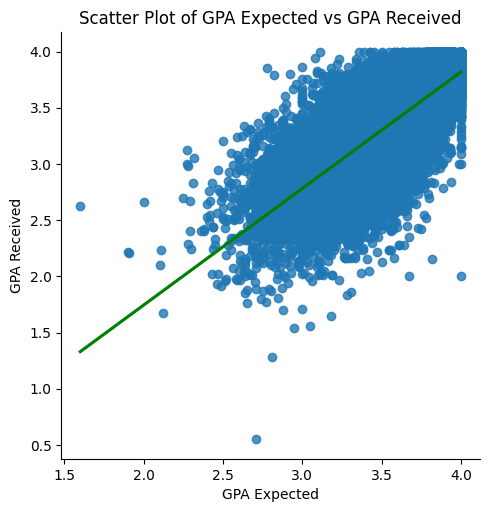

Correlation between GPA Expected and GPA Received: 0.7438715600340425


In [99]:
# Create the scatter plot with the line of best fit
sns.lmplot(x='gpa_expected', y='gpa_received', data=df_valid, ci=None, line_kws={'color': 'green'})
plt.title('Scatter Plot of GPA Expected vs GPA Received')
plt.xlabel('GPA Expected')
plt.ylabel('GPA Received')
plt.show()
print('Correlation between GPA Expected and GPA Received:', df_valid['gpa_expected'].corr(df_valid['gpa_received']))

as we can see from the graph, the GPA received has a very strong, positive correlation with GPA expected, thus we conclude the expected GPA is positively related to GPA received. 

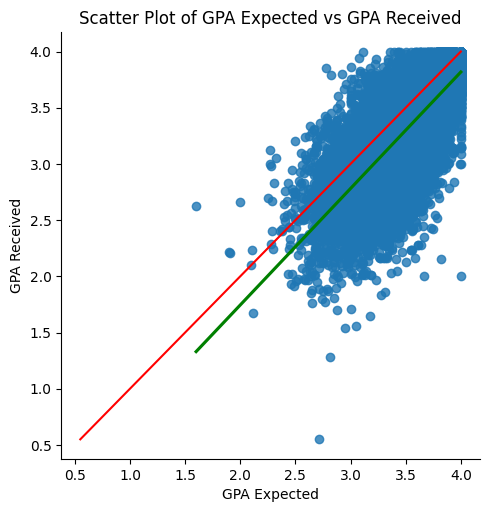

In [87]:
# Create the scatter plot with the line of best fit
sns.lmplot(x='gpa_expected', y='gpa_received', data=df_valid, ci=None, line_kws={'color': 'green'})
sns.lineplot(x='gpa_received', y='gpa_received', data=df_valid, color='red')
plt.title('Scatter Plot of GPA Expected vs GPA Received')
plt.xlabel('GPA Expected')
plt.ylabel('GPA Received')
plt.show()

Additionally, we plot a line $y=x$ on top of the scatterplot, and we noticed that our line of best fit lies completely under the line $y=x$. This suggests that on average the expected GPA is higher than the actual GPA received, so students tend to overestimate their GPA.

# Ethics & Privacy

There are several potential ethics and privacy issues associated with the data that will be used in this study. The first issue is related to the collection of the data. Since the data has been collected from students who responded to the cape questionnaires at UCSD, it may not be representative of the overall student population. Students who responded might be more motivated, engaged, or have stronger opinions than those who did not. This self-selection bias could potentially skew the data and impact the generalizability of the study's findings. Further, as the data is from a university setting, there are strict privacy regulations (like FERPA) that need to be followed. Although the data seems anonymized, we should still take measures to ensure it doesn't contain any personal identifiers. In terms of biases, the data could be prone to various forms of biases including selection bias (only those who responded are included), reporting bias (students might report expected GPA or time commitments inaccurately), and confirmation bias (interpretation might favor the initial hypothesis). 

To mitigate these biases, data cleaning approaches are utilized, which includes discarding data with response rates less than 0.4. Moreover, extensive exploratory data analysis will be performed to understand the distribution and potential outliers within the data. In communicating our analysis, we will be transparent about the limitations of our data and how they might have impacted our results. Lastly, special care will be taken to ensure that the results of the analysis are not used to unfairly disadvantage any specific department or class. This is particularly important as the results could potentially stigmatize certain courses or departments if not handled appropriately.


# Conclusion & Discussion

Overall, the analysis of our initial question about predictors of class average GPA at UCSD has yielded several significant findings:
- The results confirmed our hypothesis that there is a strong positive correlation ($r=0.74$) between students' expected GPA and their actual GPA, suggesting that students generally achieve the grades they anticipate. Even though they do tend to overestimate a little, their expectations of the course still play an important role in their academic performance.
- The results also aligned with our hypothesis, showing a weak negative correlation ($r=-0.30$) between study time commitment and GPA, and a weak positive correlation ($r=0.32,r=0.29$) between class/professor evaluation and GPA. These are all indicators of the difficulty of the class, quality of the content delivered in lectures, and clarity of the assignments.
- Another important finding was the variation in average GPAs between different fields. For example, arts-related classes consistently had higher GPAs compared to engineering classes. This difference may be attributed to variations in grading practices, course difficulty, or the nature of the subject matter. 
- Surprisingly, we discovered that upper division classes in many departments got higher average GPAs compared to lower division classes. This challenges the common assumption that upper division courses are inherently more challenging and may have lower average GPAs. We suggest that this might be due to the fact that lower division classes, such as college required writings, are sometimes requirements for students that may major in other fields, which can result in a higher variance and more outliers with low GPAs. However, the CAPE dataset does not collect student majors, so it limits us from further exploring whether this proposed reason indeed led to our findings.
- We also found that there is a slight tendency for summer sessions to have a slightly lower GPA than regular terms. This finding suggests that the academic performance during summer sessions may be influenced by factors such as accelerated course schedules requiring effective time management, and the availability of resources in summer. Again, validating this requires more data.

The impact of this work on society lies in its potential to enhance students' academic experiences and inform university policies. When students look at CAPE results, they will be able to weigh the importance of each variable based on our findings. By identifying the factors influencing GPA, universities can design strategies to support students' learning and success. For example, understanding the positive correlation between class and professor recommendations with GPA could prompt universities to prioritize effective teaching practices and faculty development; recognizing the variations in average GPAs across departments can aid in fostering a more balanced and inclusive academic environment that caters to students with diverse interests and strengths; and recognizing the discrepancy between the average GPA in regular terms and summer sessions suggests universities to give specific accomodations for summer sessions and adjust grading components accordingly.

Despite the valuable insights gained from this project, certain limitations should be acknowledged. As mentioned previously, the CAPE dataset has its limitations in the types of data collected, so we may not capture all relevant factors that influence GPA. As our research question suggests, we are only finding predictors of the average GPA of a class, especially when some of our predictors are based on student surveys. We would require data with more variables and conduct causal inference to establish causal relationships. Additionally, the findings are specific to UCSD and may not be generalizable to other institutions: apart from the biases we mentioned in the previous section, which may affect the generalizablity of our results, quarter or semester systems and grading criteria both might affect the results. Replication studies at different universities can provide a broader perspective on the predictors of GPA.

# Team Contributions

- Haonan He: Worked on the Ethics and Privacy of our research questions. Data analysis for Time Commitment vs average GPA received. 
- Xuechen kan: research and elaborate on background information and prior work done. Data analysis for expected GPA vs. received GPA with linear regression and graph. 
- Yiqing Bo: Research question & hypothesis formulation, Data analysis for upper vs. lower division and cross department comparison of GPA.
- Fanglei Gao: data scraping, data cleaning, and conclusion & discussion. Data analysis for average GPA received in regular terms vs. summer sessions.
- Keyi Chen: Description for ideal dataset used. Data analysis for class evaluation vs. average GPA received & instructor evaluation vs. average GPA received.
